In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
with open("sales_data.sql", "r") as f:
    sql_script = f.read()

In [11]:
sql_script = sql_script.replace("create database sales_db;", "")
sql_script = sql_script.replace("use sales_db;", "")

In [18]:
cursor.executescript(sql_script)
conn.commit()

OperationalError: table sales_data already exists

In [16]:
query = """
SELECT 
    product_name AS product,
    SUM(unit_sold) AS total_qty,
    SUM(total_revenue) AS revenue
FROM sales_data
GROUP BY product_name
"""

In [17]:
df = pd.read_sql_query(query, conn)
print(df)

                       product  total_qty  revenue
0              Blueair Classic          2     1998
1             Dyson V11 Vacuum          1      499
2                  Levis Jeans          2     1998
3          Neutrogena Skincare          1      999
4                     Nike Air          5     2495
5                 The Da Vinci          3      147
6  Wilson Evolution Basketball          2      998
7                iPhone 14 Pro          2     1998


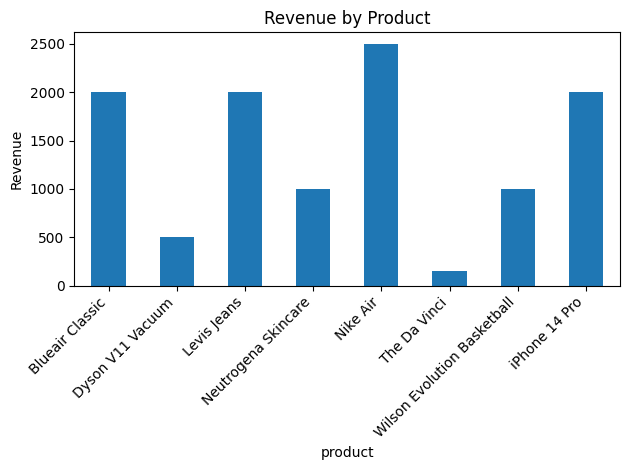

In [19]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [21]:
plt.savefig("sales_chart.png")
plt.show()

<Figure size 640x480 with 0 Axes>